In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols_to_use = ['Month', 'Sales', 'Budget']

In [3]:
df=pd.read_csv('Monthly_Sales_for_Laptops.csv', usecols=cols_to_use)

In [4]:
df.head()

,Month,Sales,Budget
0,Jan-14,"$14,840","$13,740"
1,Feb-14,"$14,820","$16,466"
2,Mar-14,"$17,920","$18,474"
3,Apr-14,"$19,020","$17,449"
4,May-14,"$20,600","$22,150"


In [5]:
df.dtypes

Month     object
Sales     object
Budget    object
dtype: object

In [6]:
df.tail()

,Month,Sales,Budget
67,Aug-19,NaN,"$17,226"
68,Sep-19,NaN,"$19,822"
69,Oct-19,NaN,"$22,506"
70,Nov-19,NaN,"$53,196"
71,Dec-19,NaN,"$44,572"


In [7]:
print(df['Month'])

0     Jan-14
1     Feb-14
2     Mar-14
3     Apr-14
4     May-14
       ...  
67    Aug-19
68    Sep-19
69    Oct-19
70    Nov-19
71    Dec-19
Name: Month, Length: 72, dtype: object


In [8]:
# Convert Month into Datetime
#df['Month']=pd.to_datetime(df['Month'],format='%d-%b-%y')


#df['Month']=datetime.strptime(df['Month'],"%d-%m-%Y").date()
#datetime.strptime(pd.to_datetime(df['Month']),"%d-%m%Y").date()

#pd.to_datetime(df['Month'], format = '%d-%m%Y')

df['Month']=pd.to_datetime(df['Month'], format = '%b-%y')

In [9]:
df.head()

,Month,Sales,Budget
0,2014-01-01,"$14,840","$13,740"
1,2014-02-01,"$14,820","$16,466"
2,2014-03-01,"$17,920","$18,474"
3,2014-04-01,"$19,020","$17,449"
4,2014-05-01,"$20,600","$22,150"


In [10]:
df.tail()

,Month,Sales,Budget
67,2019-08-01,NaN,"$17,226"
68,2019-09-01,NaN,"$19,822"
69,2019-10-01,NaN,"$22,506"
70,2019-11-01,NaN,"$53,196"
71,2019-12-01,NaN,"$44,572"


In [11]:
df.dtypes

Month     datetime64[ns]
Sales             object
Budget            object
dtype: object

In [10]:
#df['Month']=df['Month'].apply(pd.to_datetime)
#df['Month']=pd.to_datetime(df['Month']).dt.date

#df['Month']=df['Month'].astype('datetime64[ns]')

In [12]:
pd.__version__

'0.25.1'

In [13]:
df.set_index('Month',inplace=True)

In [14]:
df.head()

,Sales,Budget
Month,,
2014-01-01,"$14,840","$13,740"
2014-02-01,"$14,820","$16,466"
2014-03-01,"$17,920","$18,474"
2014-04-01,"$19,020","$17,449"
2014-05-01,"$20,600","$22,150"


In [15]:
df.describe()

,Sales,Budget
count,60,72
unique,59,72
top,"$20,600","$12,907"
freq,2,1


In [16]:
df.dtypes

Sales     object
Budget    object
dtype: object

In [17]:
df

,Sales,Budget
Month,,
2014-01-01,"$14,840","$13,740"
2014-02-01,"$14,820","$16,466"
2014-03-01,"$17,920","$18,474"
2014-04-01,"$19,020","$17,449"
2014-05-01,"$20,600","$22,150"
...,...,...
2019-08-01,NaN,"$17,226"
2019-09-01,NaN,"$19,822"
2019-10-01,NaN,"$22,506"


In [18]:
df['Sales'] = df['Sales'].replace('[\$,]', '', regex=True).astype(float)
df['Budget'] = df['Budget'].replace('[\$,]', '', regex=True).astype(float)

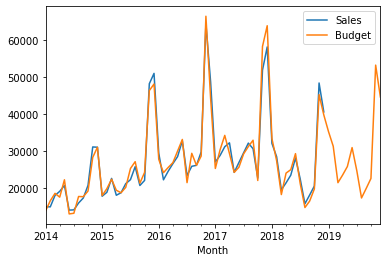

In [19]:
df.plot()

In [20]:
#The Augmented Dickey-Fuller Test is a well known statistical test that can help determine if your time series is stationary.
#In a Stationary time series, there is no visible trend.
#ADF=unit root test. Unit roots are a cause for non-stationarity, the ADF test will test if unit root is present.
#Null Hypothesis states there is the presence of a unit root.
#Alternate Hypothesis states there is no unit root. In other words, Stationarity exists.
#adfuller - function to perform ADF
from statsmodels.tsa.stattools import adfuller

In [21]:
df['Sales'] = df['Sales'].replace([np.inf, -np.inf], np.nan).fillna(0)
test_result=adfuller(df['Sales'].values)

In [22]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [23]:
adfuller_test(df['Sales'])

ADF Test Statistic : 0.3521811856439784
p-value : 0.9796158709799642
#Lags Used : 12
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [24]:
#Differencing

df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [25]:
df['Sales'].shift(1)

Month
2014-01-01        NaN
2014-02-01    14840.0
2014-03-01    14820.0
2014-04-01    17920.0
2014-05-01    19020.0
               ...   
2019-08-01        0.0
2019-09-01        0.0
2019-10-01        0.0
2019-11-01        0.0
2019-12-01        0.0
Name: Sales, Length: 72, dtype: float64

In [26]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [27]:
df.head(20)

,Sales,Budget,Sales First Difference,Seasonal First Difference
Month,,,,
2014-01-01,14840.0,13740.0,NaN,NaN
2014-02-01,14820.0,16466.0,-20.0,NaN
2014-03-01,17920.0,18474.0,3100.0,NaN
2014-04-01,19020.0,17449.0,1100.0,NaN
2014-05-01,20600.0,22150.0,1580.0,NaN
2014-06-01,13940.0,12907.0,-6660.0,NaN
2014-07-01,14000.0,13084.0,60.0,NaN
2014-08-01,15860.0,17622.0,1860.0,NaN
2014-09-01,17220.0,17571.0,1360.0,NaN


In [28]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : 2.564016873524915
p-value : 0.9990676279654248
#Lags Used : 9
Number of Observations Used : 50
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [29]:
df['Seasonal Second Difference']=df['Seasonal First Difference']-df['Seasonal First Difference'].shift(12)

In [30]:
df.head(20)

,Sales,Budget,Sales First Difference,Seasonal First Difference,Seasonal Second Difference
Month,,,,,
2014-01-01,14840.0,13740.0,NaN,NaN,NaN
2014-02-01,14820.0,16466.0,-20.0,NaN,NaN
2014-03-01,17920.0,18474.0,3100.0,NaN,NaN
2014-04-01,19020.0,17449.0,1100.0,NaN,NaN
2014-05-01,20600.0,22150.0,1580.0,NaN,NaN
2014-06-01,13940.0,12907.0,-6660.0,NaN,NaN
2014-07-01,14000.0,13084.0,60.0,NaN,NaN
2014-08-01,15860.0,17622.0,1860.0,NaN,NaN
2014-09-01,17220.0,17571.0,1360.0,NaN,NaN


In [31]:
## Again test dickey fuller test
adfuller_test(df['Seasonal Second Difference'].dropna())

ADF Test Statistic : -1.2859974303495383
p-value : 0.6355539106633826
#Lags Used : 4
Number of Observations Used : 43
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
##Seasonal Third Difference

df['Seasonal Third Difference']=df['Seasonal Second Difference']-df['Seasonal Second Difference'].shift(12)
## Again test dickey fuller test
adfuller_test(df['Seasonal Third Difference'].dropna())

ADF Test Statistic : -1.5056009156947225
p-value : 0.5307388488511565
#Lags Used : 4
Number of Observations Used : 31
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [35]:
##Seasonal Fourth Difference

df['Seasonal Fourth Difference']=df['Seasonal Third Difference']-df['Seasonal Third Difference'].shift(12)
## Again test dickey fuller test
adfuller_test(df['Seasonal Fourth Difference'].dropna())

ADF Test Statistic : -1.5227933084380052
p-value : 0.5222071997722417
#Lags Used : 4
Number of Observations Used : 19
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


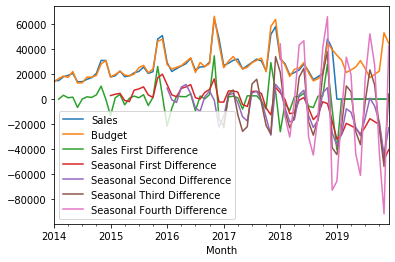

In [36]:
df.plot()